In [1]:
from walkmodel import *

# Computation step by step 

The following cells hould be run in a row to have an appropriate result.

1 - Intialize the model (the rest of the computations should not be touched, except several orbits are found)

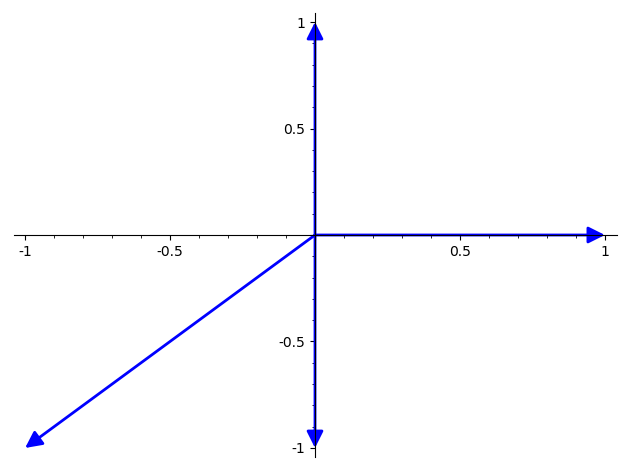

CPU times: user 563 ms, sys: 41.3 ms, total: 605 ms
Wall time: 822 ms


In [4]:
%%time
m = dic_DHRS['wIIB.1'];
show(plot(m));

2 - Compute the function $b_2(x,y)$

In [5]:
%%time
b2 = m.b('y'); 
show(b2)

(x*y^2 - x - 1)/(-y)

CPU times: user 232 ms, sys: 32 ms, total: 264 ms
Wall time: 292 ms


3 - Computing the possible candidates for poles of $b_2(x,y)$. We do that in $[(x_0:x_1),(y_0:y_1)]$ coordinates.

In [6]:
%%time
candidates = m.poles(b2, "A"); 
for P in candidates:
    print P;

(1 : 0 , 1 : 0)
(0 : 1 , 1 : 0)
(1 : 0 , 0 : 1)
(-1 : 1 , 0 : 1)
CPU times: user 232 ms, sys: 22.5 ms, total: 254 ms
Wall time: 267 ms


4 - We compute the orbits (up to distance 5) between the candidates

In [8]:
%%time
orbits,jumps = m.orbits(candidates)
print orbits, jumps # Just one orbit found
orbit = orbits[0]
jumps = jumps[0];

[[(-1 : 1 , 0 : 1), (1 : 0 , 1 : 0), (0 : 1 , 1 : 0), (1 : 0 , 0 : 1)]] [[1, 1, 1]]
CPU times: user 250 ms, sys: 14.7 ms, total: 265 ms
Wall time: 289 ms


We have at this point $orbit = [P_0,P_1,P_2,P_3]$ and $jump = [n_0,n_1,n_2]$.

We may check that we really have $P_i = \tau^{n_i}(P_{i+1})$ for all $i = 0,...,2$

In [9]:
%%time
tau = m.app_proj_tau;
for i in range(len(orbit)-1):
    P = orbit[i+1]
    for j in range(jumps[i]):
        P = tau(P);
    if(P != orbit[i]):
        raise ValueError("Error in the orbit: position %d" %i);
        
print "No error --> The orbit is correct";

No error --> The orbit is correct
CPU times: user 69.6 ms, sys: 0 ns, total: 69.6 ms
Wall time: 68.6 ms


5 - Compute the derivative of $b_2(x,y)$ (i.e., $\delta(b_2(x,y))$). We then homogenize the rational function (with $z$) and simplify it using the kernel equation.

In [10]:
%%time
db2 = m.simplify(m.derivative(b2)(x=x/z,y=y/z), "A", alg=True); 
show(db2)
print m.curve("A").coordinate_ring()

((-t)*x^3 + 3/2*x^2*z + ((2*t^2 - 1/2)/t)*x*z^2 + t*z^3)/z^3

Quotient of Multivariate Polynomial Ring in x, y, z over Fraction Field of Univariate Polynomial Ring in t over Rational Field by the ideal ((-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*z^3)
CPU times: user 554 ms, sys: 61.1 ms, total: 615 ms
Wall time: 661 ms


6 - Compute the higher (removable) polar parts of $\delta(b_2(x,y,z))$.

For doing so, we first compute the pullback of $\delta(b_2(x,y,z))$ by $\phi: (u,v,w) \rightarrow (x,y,z)$.

In [11]:
%%time
fromW_toA = m.map("W","A");

db2UP = WalkModel.pullback(fromW_toA)(db2); 
show(db2UP)
show(WalkModel.pullback(fromW_toA)(b2(x=x/z,y=y/z))(w=1))

(t*u^3 + (-t^3 + 1/4*t)*u^2*w + (-t^5 + 3/2*t^4 + 1/2*t^3 - 1/16*t)*u*w^2 + (22/27*t^7 + 1/2*t^6 + 5/36*t^5 - 1/8*t^4 - 5/144*t^3 + 5/1728*t)*w^3)/(u^3 + (t^2 - 1/4)*u^2*w + (1/3*t^4 - 1/6*t^2 + 1/48)*u*w^2 + (1/27*t^6 - 1/36*t^4 + 1/144*t^2 - 1/1728)*w^3)

(-u^3 + u*v - v^2 + (1/3*t^4 - 1/2*t^3 - 1/6*t^2 + 1/48)*u + (t^3 + 1/3*t^2 - 1/12)*v - 19/108*t^6 - 1/6*t^5 - 1/18*t^4 + 1/24*t^3 + 1/72*t^2 - 1/864)/((-1/2/t)*u^3 + 1/t*u^2*v + ((-1/2*t^3 - 1/2*t^2 + 1/8)/t)*u^2 + ((2/3*t^2 - 1/6)/t)*u*v + ((-1/3*t^5 - 1/6*t^4 + 1/12*t^3 + 1/12*t^2 - 1/96)/t)*u + ((1/9*t^4 - 1/18*t^2 + 1/144)/t)*v + (-1/18*t^7 - 1/54*t^6 + 1/36*t^5 + 1/72*t^4 - 1/288*t^3 - 1/288*t^2 + 1/3456)/t)

CPU times: user 375 ms, sys: 24.6 ms, total: 400 ms
Wall time: 444 ms


Now we convert all the candidates to $(u:v:w)$ coordinates with the map $\psi: (x_0:x_1,y_0:y_1) \rightarrow (u:v:w)$

In [16]:
%%time
fromP_toW = m.map("P","W");
print fromP_toW
candU = [WalkModel.apply_map(fromP_toW, cand) for cand in candidates]; 
for P in candU:
    print P

Scheme morphism:
  From: Closed subscheme of Product of projective spaces P^1 x P^1 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x0*x1*y1^2 + (-t)*x1^2*y1^2
  To:   Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  -u^3 + v^2*w + (1/3*t^4 - 1/2*t^3 - 1/6*t^2 + 1/48)*u*w^2 + (-19/108*t^6 - 1/6*t^5 - 1/18*t^4 + 1/24*t^3 + 1/72*t^2 - 1/864)*w^3
  Defn: Defined by sending (x0 : x1 , y0 : y1) to 
        (((1/3*t^2 - 1/12)/t^2)*x0*y1 + x1*y1 : (-t)*x1*y0 + (-1/2*t)*x0*y1 + 1/2*x1*y1 : (-1/t^2)*x0*y1).
(-1/3*t^2 + 1/12 : -1/2*t^3 : 1)
(0 : 1 : 0)
(-1/3*t^2 + 1/12 : 1/2*t^3 : 1)
(2/3*t^2 + 1/12 : 1/2*t^3 + 1/2*t^2 : 1)
CPU times: user 40 ms, sys: 7.49 ms, total: 47.5 ms
Wall time: 43.2 ms


And now we compute the polar part for each of these points. For doing so, the method $polar\_part$ first compute the two mappings $A_P$, $S_P$ on the curve such that $A_P(Q) = Q \oplus P$ and $S_P(Q) = Q \ominus P$.

Then computes the pullback by $A_P$ of the $db_2(u,v,w)$. Now analyze the behavior at $\infty$ to compute its polar part and finally, to that result, apply the pullback by $S_P$.

In [17]:
%%time
polar_parts_U = [m.simplify(m.polar_part(db2UP, cand, "W"), "W", alg=True) for cand in candU]; 
for pol in polar_parts_U:
    show(pol)

(1/3456*t*u^3 + (-1/3456*t^3 + 1/13824*t)*u^2*w + (-1/3456*t)*u*v*w + (-1/3456*t^5 + 1/2304*t^4 + 1/6912*t^3 - 1/55296*t)*u*w^2 + (-1/1728*t^4 - 1/10368*t^3 + 1/41472*t)*v*w^2 + (11/46656*t^7 + 1/6912*t^6 + 5/124416*t^5 - 1/27648*t^4 - 5/497664*t^3 + 5/5971968*t)*w^3)/(1/1728*u^3 + (1/1728*t^2 - 1/6912)*u^2*w + (1/5184*t^4 - 1/10368*t^2 + 1/82944)*u*w^2 + (1/46656*t^6 - 1/62208*t^4 + 1/248832*t^2 - 1/2985984)*w^3)

0

(1/3456*t*u^3 + (-1/3456*t^3 + 1/13824*t)*u^2*w + 1/3456*t*u*v*w + (-1/3456*t^5 + 1/2304*t^4 + 1/6912*t^3 - 1/55296*t)*u*w^2 + (1/1728*t^4 + 1/10368*t^3 - 1/41472*t)*v*w^2 + (11/46656*t^7 + 1/6912*t^6 + 5/124416*t^5 - 1/27648*t^4 - 5/497664*t^3 + 5/5971968*t)*w^3)/(1/1728*u^3 + (1/1728*t^2 - 1/6912)*u^2*w + (1/5184*t^4 - 1/10368*t^2 + 1/82944)*u*w^2 + (1/46656*t^6 - 1/62208*t^4 + 1/248832*t^2 - 1/2985984)*w^3)

0

CPU times: user 4.18 s, sys: 282 ms, total: 4.46 s
Wall time: 5.15 s


We go back to the $(x_0:x_1,y_0:y_1)$ coordinates using the pullback of $\psi^{-1}: (u:v:w) \rightarrow (x_0:x_1,y_0:y_1)$

In [18]:
%%time
fromP_toW = m.map("P","W");
polar_parts = [m.simplify(WalkModel.pullback(fromP_toW)(f), "P") for f in polar_parts_U]; 
for pol in polar_parts:
    show(pol)

(t*x0^2*y0 + (-1/2)*x0*x1*y0 + t*x0*x1*y1 + 1/2*t*x1^2*y1)/(x1^2*y1)

0

((-t)*x0^2*x1*y0 + 1/2*x0*x1^2*y0 + (-t)*x0^3*y1 + 3/2*x0^2*x1*y1 + ((t^2 - 1/2)/t)*x0*x1^2*y1 + 1/2*t*x1^3*y1)/(x1^3*y1)

0

CPU times: user 759 ms, sys: 67.8 ms, total: 826 ms
Wall time: 865 ms


7 - Compute the telescoper. 

If $b_2(x,y)$ telescopes, then we have that $\delta(b_2) = c + \tau(h) - h$ for a particular rational function $h$.

Such $h$ can be computed using the polar parts:
$$h = \sum_{j=0}^{len(orbit)-1} \left(\sum_{k=1}^{distance(orbit[0],orbit[j])} \tau^{-k}(polar\_part[j])\right)$$

In [19]:
%%time
itau = WalkModel.pullback(m.itau("P"));
h = polar_parts[0];
dist = 0;
for j in range(1,len(orbit)):
    dist += jumps[j-1];
    pp = polar_parts[j];
    to_add = 0;
    for k in range(1, dist+1):
        pp = itau(pp);
        to_add += pp;
    h += m.simplify(to_add, "P"); #We simplify i each step

CPU times: user 998 ms, sys: 66.4 ms, total: 1.06 s
Wall time: 1.11 s


We know simplify this final result

In [20]:
%%time
h = m.simplify(h, "P"); 
show(m.simplify(h(x0=x,x1=z,y0=y,y1=z), "A", alg=True))

((-1/2*t)*x + (-t)*y + 1/2*z)/x

CPU times: user 291 ms, sys: 47.9 ms, total: 339 ms
Wall time: 357 ms


And we can compute now the constant $c$:

In [24]:
%%time 
C = db2(x=x0/x1,y=y0/y1,z=1) - WalkModel.pullback(m.tau("P"))(h) + h;

C2 = m.simplify(C(x0=x,x1=1,y0=y,y1=1), "A", alg=True)
show(C2)

(t*x^3*y + (-1/2)*x^2*y*z + t*x^2*z^2 + (-t)*y*z^3 + 1/2*z^4)/(x*z^3)

CPU times: user 354 ms, sys: 56.3 ms, total: 410 ms
Wall time: 424 ms


# Clearly, there is some mistake

In [25]:
show(m.simplify(m.derivative(C2(z=1)).numerator().reduce([m.kernel("A")(z=1)]),"A", alg=True))

((-3/2*t^2)*x^5*y + 3/2*t*x^4*y*z + (-3/2*t^2)*x^4*z^2 + (t^2 - 1/4)*x^3*y*z^2 + (-3/2*t^2)*x^3*z^3 + (-t^2 + 1/4)*x*z^5 + (-3/2*t^2)*z^6)/(x*z^5)

In [25]:
(C2)

(t*x^3*y + (-1/2)*x^2*y*z + t*x^2*z^2 + (-t)*y*z^3 + 1/2*z^4)/(x*z^3)

In [29]:
show(m.kernel("A"))

(-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*z^3

In [38]:
C2_UV = m.simplify(WalkModel.pullback(m.map("W","A"))(C2), "W", alg=True)
show(C2_UV)

((-1/1728/t^2)*u^3*v + 1/3456*t*u^3*w + ((-1/1728*t^2 + 1/6912)/t^2)*u^2*v*w + (-1/3456*t^3 + 1/13824*t)*u^2*w^2 + ((-1/5184*t^4 - 1/3456*t^3 + 1/10368*t^2 - 1/82944)/t^2)*u*v*w^2 + (-1/3456*t^5 + 1/2304*t^4 + 1/6912*t^3 - 1/55296*t)*u*w^3 + ((-7/11664*t^6 - 1/10368*t^5 + 1/62208*t^4 + 1/41472*t^3 - 1/248832*t^2 + 1/2985984)/t^2)*v*w^3 + (11/46656*t^7 + 1/6912*t^6 + 5/124416*t^5 - 1/27648*t^4 - 5/497664*t^3 + 5/5971968*t)*w^4)/(1/1728*u^3*w + (1/1728*t^2 - 1/6912)*u^2*w^2 + (1/5184*t^4 - 1/10368*t^2 + 1/82944)*u*w^3 + (1/46656*t^6 - 1/62208*t^4 + 1/248832*t^2 - 1/2985984)*w^4)

In [36]:
polar_parts_U = [m.simplify(m.polar_part(C2_UV, cand, "W"), "W", alg=True) for cand in candU]; 

In [37]:
polar_parts_U

[(1/3456*t*u^3 + (-1/3456*t^3 + 1/13824*t)*u^2*w + (-1/3456*t)*u*v*w + (-1/3456*t^5 + 1/2304*t^4 + 1/6912*t^3 - 1/55296*t)*u*w^2 + (-1/1728*t^4 - 1/10368*t^3 + 1/41472*t)*v*w^2 + (11/46656*t^7 + 1/6912*t^6 + 5/124416*t^5 - 1/27648*t^4 - 5/497664*t^3 + 5/5971968*t)*w^3)/(1/1728*u^3 + (1/1728*t^2 - 1/6912)*u^2*w + (1/5184*t^4 - 1/10368*t^2 + 1/82944)*u*w^2 + (1/46656*t^6 - 1/62208*t^4 + 1/248832*t^2 - 1/2985984)*w^3),
 ((-1/t^2)*v)/w,
 0,
 0]